# ‿︿‿︿‿︿‿︿‿︿‿︿‿RANDOM FOREST‿︿‿︿‿︿‿︿‿︿‿︿‿︿

# 

<img src='https://raw.githubusercontent.com/JohnyTheTerminator/ML-modely---projekty/main/Pictures/Random-forest.png' style='width:850px;height:550px'>

# Import of all libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [76]:
file_path = 'C:/Users/42073/Desktop/_Python/Datasety/iris-data.csv'
df = pd.read_csv(file_path)

In [77]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
df.shape

(150, 5)

In [79]:
df['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [80]:
df['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [81]:
df['class'].replace(["Iris-setossa","versicolor"], ["Iris-setosa","Iris-versicolor"], inplace=True)
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [82]:
iris_setosa_count = (df['class'] == 'Iris-setosa').sum()
iris_versicolor = (df['class'] == 'Iris-versicolor').sum()
iris_virginica = (df['class'] == 'Iris-virginica').sum()

print(iris_setosa_count)
print(iris_versicolor)
print(iris_virginica)

50
50
50


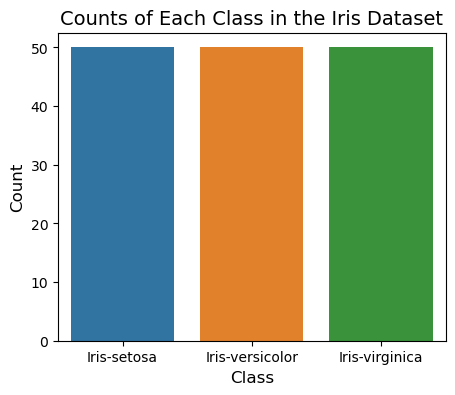

In [83]:
iris_setosa_count = (df['class'] == 'Iris-setosa').sum()
iris_versicolor_count = (df['class'] == 'Iris-versicolor').sum()
iris_virginica_count = (df['class'] == 'Iris-virginica').sum()

# Create a DataFrame to hold the counts
class_counts_df = pd.DataFrame({
    'Class': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    'Count': [iris_setosa_count, iris_versicolor_count, iris_virginica_count]
})

# Create a bar plot using Seaborn
plt.figure(figsize=(5, 4))
sns.barplot(x='Class', y='Count', data=class_counts_df)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Counts of Each Class in the Iris Dataset', fontsize=14)
plt.show()

In [84]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [89]:
df.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'],
      dtype='object')

In [86]:
#Removing all null values row
df = df.dropna(subset=['petal_width_cm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


# Plot

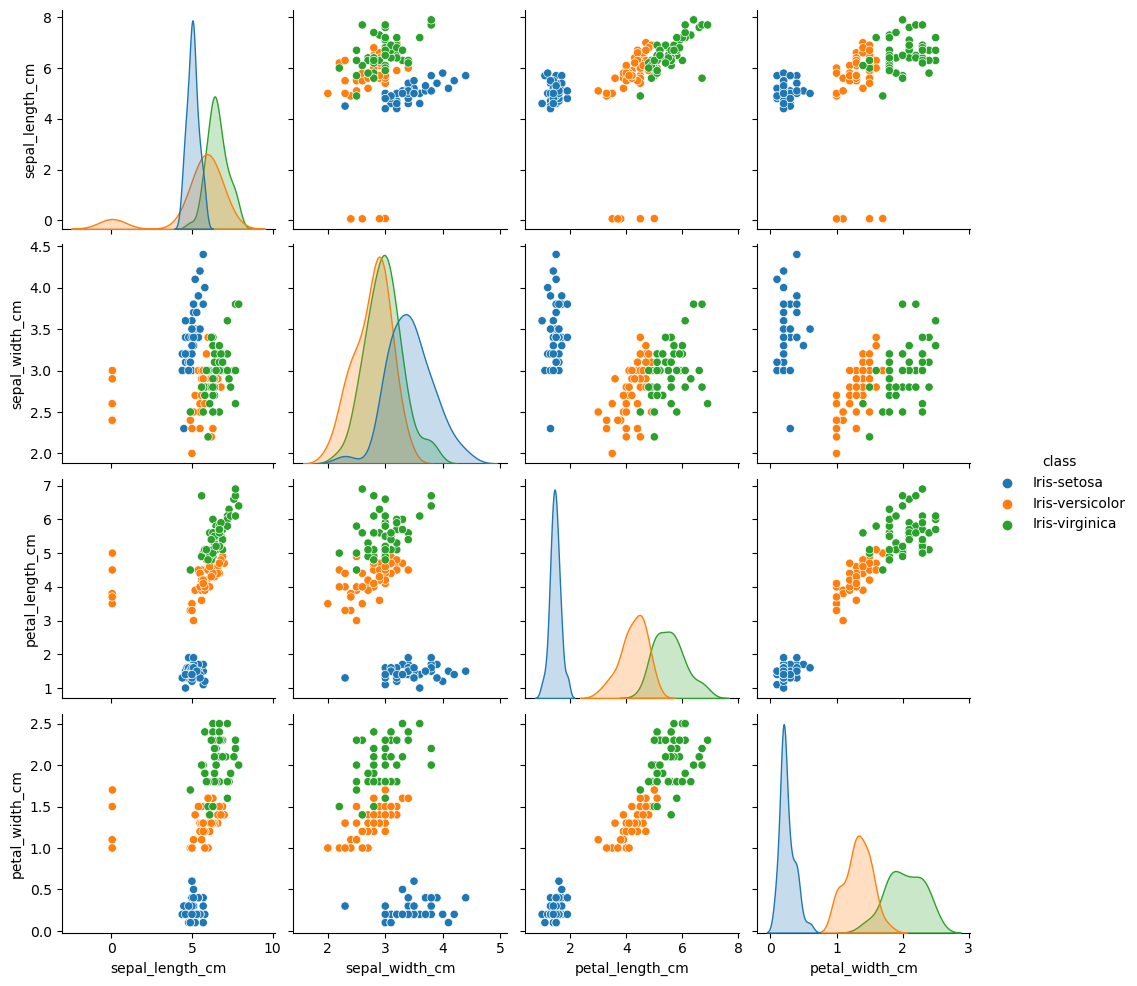

In [87]:
sns.pairplot(df, hue='class', height=2.5)

# Label Encoding

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit and transform the 'class' column to label encode the class labels
df['class_encoded'] = le.fit_transform(df['class'])

print("Original classes:", le.classes_)
print("Encoded classes:", le.transform(le.classes_))

df.head(10)

Original classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Encoded classes: [0 1 2]


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,class_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,0
13,5.7,3.0,1.1,0.1,Iris-setosa,0
14,5.8,4.0,1.2,0.2,Iris-setosa,0


# Model Construction

# Random forest

In [118]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [119]:
# Assuming you have a DataFrame named 'df' with a column named 'class' containing class labels
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'class' column
df['class_encoded'] = le.fit_transform(df['class'])

# Separate the features (X) and the target (y)
X = df[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']]
y = df['class_encoded']

In [120]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 100 trees (you can adjust this parameter as needed)
random_forest = RandomForestClassifier(n_estimators=100)

# Fit the model on the training data
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [121]:
# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy:', accuracy)


Test Accuracy: 0.896551724137931


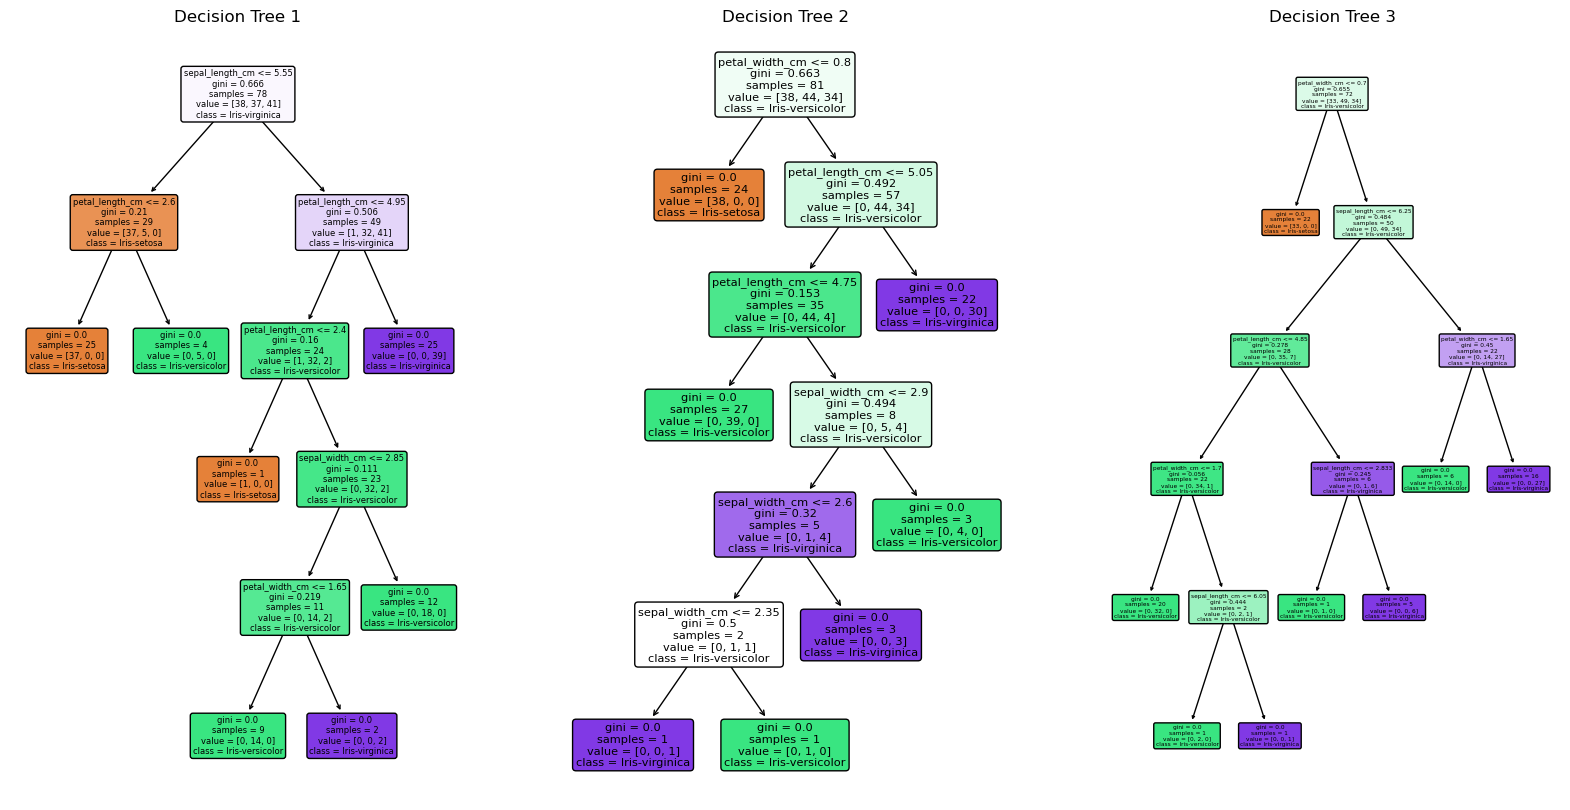

In [122]:
# Plot the first few decision trees in the Random Forest
plt.figure(figsize=(20, 10))
for i in range(3):  # Plot the first three trees
    plt.subplot(1, 3, i + 1)
    plot_tree(random_forest.estimators_[i], feature_names=X.columns, class_names=le.classes_,
              filled=True, rounded=True)
    plt.title('Decision Tree {}'.format(i+1))

plt.show()